In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [224]:
dictionaries = [
        #     cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_1000),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_100),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_50), #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_100), #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_250), #este
            cv2.aruco.DICT_7X7_100, #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16H5),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_25h9),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_25H9),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36h10), 
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H10),
            cv2.aruco.DICT_APRILTAG_36h11,#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11),#este
            cv2.aruco.DICT_ARUCO_MIP_36h12,#este
            # cv2.aruco.DICT_ARUCO_MIP_36H12 #este
            ]


# Distance measurement
mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
undist = np.array([0,0,0,0,0])
dist=undist

markerLengthdic = {"13": 0.1, "20":0.1} #marker lenght in meters depending on the type of marker


def detect_and_plot(image, plot = True, dictionaries=dictionaries):
    parameters =  cv2.aruco.DetectorParameters()
    info = []
    rejectedCandidates=[]

    for d, dictionar in enumerate(dictionaries):
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorner, markerId, rejectedCandidate = detector.detectMarkers(image)
        markerLength = 0.1 #markerLengthdic[str(dictionar)]
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
        if markerCorner:
            for corner,Id, r in zip(markerCorner, markerId, rejectedCandidate):
                print(len(info))
                print(Id)        
                info.append([corner,Id, rvecs, tvecs])

        if rejectedCandidate:
            rejectedCandidates.append(rejectedCandidate)
        
    print("Number of detected markers:", len(info))
    # print("Number of rejected candidates:", len(rejectedCandidates))

    if plot:
        for candidate, _, _, _ in info:
                candidate = np.array(candidate)[0].reshape((4, 2))  # Get the 4 corner points
                for i in range(4):
                    # Convert to integers
                    pt1 = tuple(map(int, candidate[i]))
                    pt2 = tuple(map(int, candidate[(i + 1) % 4]))
                    cv2.line(image, pt1, pt2, (0,255, 0), 2)
                
                # Optionally, draw a circle at each corner for visibility
                for point in candidate:
                    pt = tuple(map(int, point))
                    cv2.circle(image, pt, 1, (0, 0, 255), -1)
                
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    return info

Image 1
0
[37]
1
[8]
2
[182]
Number of detected markers: 3


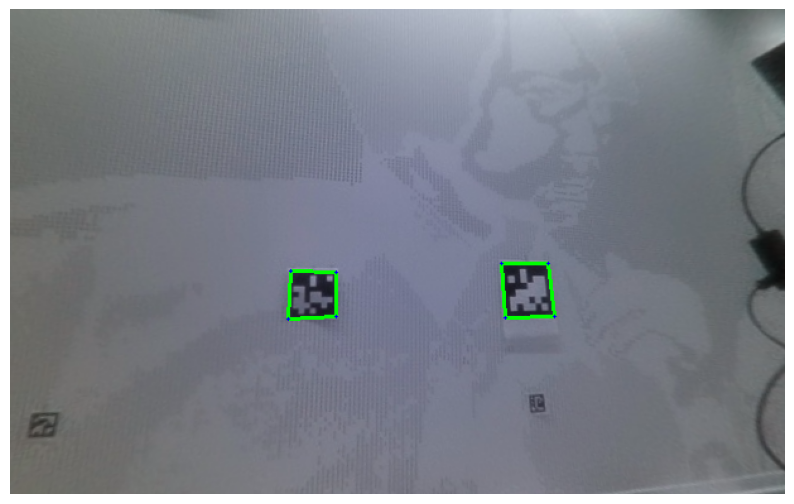

Image 2
0
[37]
1
[8]
2
[182]
3
[19]
Number of detected markers: 4


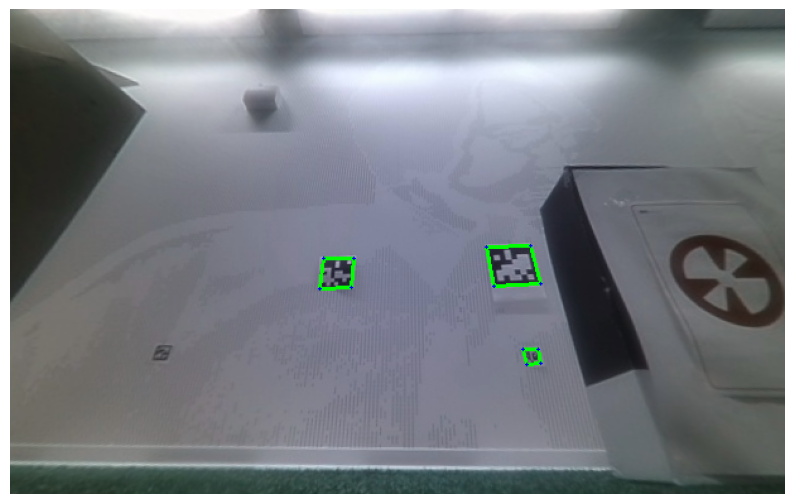

Image 3
0
[37]
1
[8]
Number of detected markers: 2


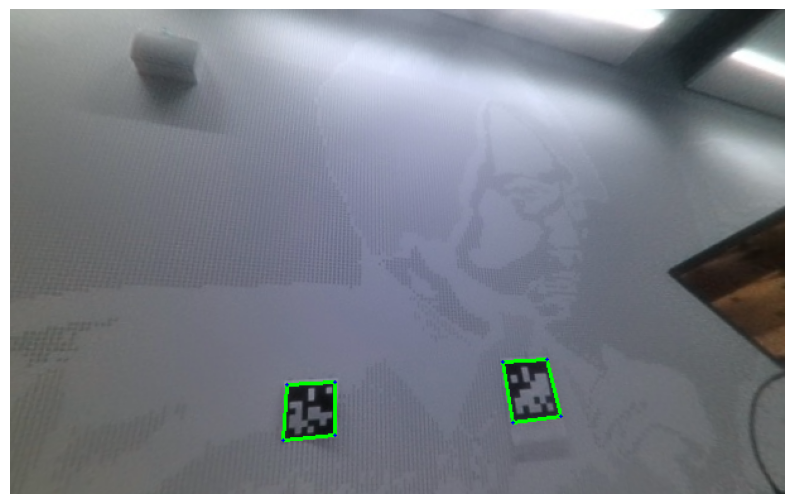

In [225]:
images = ["Archive/2024-11-12 16_49_57.png",
          "Archive/2024-11-12 16_50_23.png",
          "Archive/2024-11-12 16_49_55.png"
          ]

for i, img in enumerate(images):
    print("Image",i+1)
    image = cv2.imread(img)
    info = detect_and_plot(image)

In [17]:
print(info[0])

[(array([[[257., 337.],
        [216., 341.],
        [219., 297.],
        [257., 295.]]], dtype=float32),), array([[37]], dtype=int32), array([[[-0.05228358,  2.46736007, -0.48513197]]]), array([[[-0.22001407,  0.27267198,  0.70352661]]])]


In [22]:
# Distance measurement
mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
undist = np.array([0,0,0,0,0])
dist=undist

markerLengthdic = {"13": 0.1, "20":0.1, "37":0.1, "8":0.1} #marker lenght in meters depending on the type of marker


for i, img in enumerate(images):
    print("Image",i+1)
    image = cv2.imread(img)
    info = detect_and_plot(image, False)
    for idx, [markerCorner, markerId, rvecs, tvecs] in enumerate(info):
        if len(markerCorner) > 0:
            markerLength = markerLengthdic[str(markerId[0][0])]
            rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
            print(rvecs)
            print(tvecs)
            distance = np.linalg.norm(tvecs)
            print(f"Distance to the marker {idx}: {distance} meters")
    print("")
    

Image 1
Number of detected markers: 2
[[[-0.02977073  2.57258596 -0.02202712]]]
[[[-0.23504532  0.04863239  0.76969435]]]
Distance to the marker 0: 0.8062510821142841 meters
[[[ 0.02952378  2.86673181 -0.25833791]]]
[[[0.19509846 0.03278508 0.65797001]]]
Distance to the marker 1: 0.687068265048719 meters

Image 2
Number of detected markers: 2
[[[ 0.00554216  3.17678224 -0.58697841]]]
[[[-0.26836936  0.00240265  1.12059461]]]
Distance to the marker 0: 1.1522847632021296 meters
[[[ 0.08225068  2.98974612 -0.84604024]]]
[[[ 0.19682307 -0.01577993  0.77412163]]]
Distance to the marker 1: 0.7989071469877521 meters

Image 3
Number of detected markers: 2
[[[-0.05228358  2.46736007 -0.48513197]]]
[[[-0.22001407  0.27267198  0.70352661]]]
Distance to the marker 0: 0.7859426768963578 meters
[[[ 0.04191648  2.71230635 -0.55194665]]]
[[[0.19395578 0.20845239 0.63304849]]]
Distance to the marker 1: 0.6941337303025634 meters



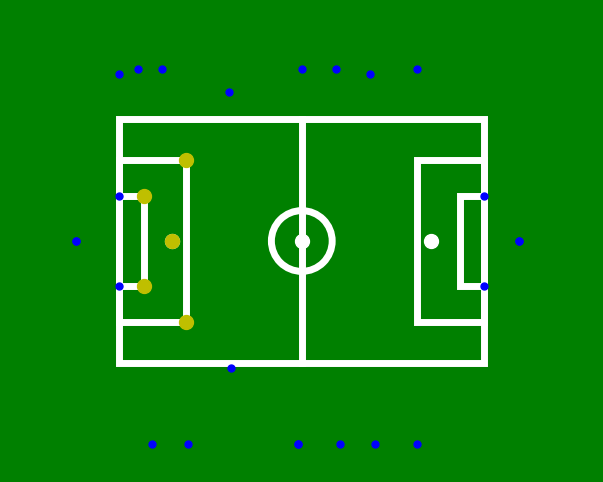

In [202]:
import matplotlib.pyplot as plt
from matplotlib import patches

# Unique marker keys with (x, x, z (in mm), length_of_square (in m))
markers = {
    # window
    # "36H11_
    "79": (-4500, 1060+3000+50, 510, 0.08),
    # "36H11_
    "26": (-4500+450, 130 + 1060 +3000+50, 1080, 0.235),
    # "36H12_
    "67": (-4500+450+530+80, 130 + 1060 +3000+50, 1000, 0.2),
    # "36H11_
    "69": (-1800, 620 + 3000+50, 500, 0.08),
    # "36H11_
    "18": (0, 130 + 1060 +3000+50, 1050, 0.28),
    # "36H12_
    "47": (840, 130 + 1060 +3000+50, 1050, 0.2),
    # "36H11_
    "9": (840+850, 1060 +3000+50, 500, 0.08),
    # "36H11_
    "66": (840+850+1150, 130 + 1060 +3000+50, 1100, 0.235),

    # tables
    # "36H11_
    "39": (4500, 1100, 500, 0.08),
    # "36H11_
    "46": (4550+820, 0, 1680, 0.235), #the one up
    # "36H12_
    "57": (4550+820, 0, 1000, 0.2), # the lower one
    # "36H11_
    "49": (4500, -1100, 500, 0.08),

    # wall
    # "36H11_
    "16": (2850, -2000-3005, 1070, 0.235),
    # "36H11_
    "19": (2850-1050, -2000-3005, 510, 0.08),
    # "7x7_
    "37": (2850-1050-850, -2000-3005, 1000, 0.2),
    # "36H11_
    "8": (2850-1050-850-1050, -2000-3005, 500, 0.08), #one on the bottom
    # "36H11_
    "29": (2850-1050-850-1050, -2000-3005, 1060, 0.275), #one on top
    # "36H11_
    "59": (-2800+1050, -120-3005, 510, 0.08), #column one
    # "7x7_
    "27": (-2800, -2000-3005, 1000, 0.2), #
    # "36H11_
    "36": (-2800-900, -2000-3005, 1080, 0.235),

    #ducks
    # "7x7_
    "7": (-4600-50-930, 0, 1680, 0.2), #lower one in column
    # "36H11_
    "56": (-4600-50-930, 0, 1000, 0.235), #top one in column
    # "36H11_
    "89": (-4500, -1100, 450, 0.08),
    # "36H11_
    "99": (-4500,1100, 500, 0.08), #window
}
# print(len(markers))
# Dimensions in mm
A = 9000  # Field length
B = 6000  # Field width
C = 50    # Line width
D = 100   # Penalty mark size
E = 600   # Goal area length
F = 2200  # Goal area width
G = 1650  # Penalty area length
H = 4000  # Penalty area width
I = 1300  # Penalty mark distance
J = 1500  # Center circle diameter
K = 2700   # Border strip width

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("green")  # Set the background color to green

# Draw the outer field
outer_field = patches.Rectangle((0, 0), A, B, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(outer_field)

# Goal areas
goal_area_left = patches.Rectangle((0, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
goal_area_right = patches.Rectangle((A - E, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(goal_area_left)
ax.add_patch(goal_area_right)

# Penalty areas
penalty_area_left = patches.Rectangle((0, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
penalty_area_right = patches.Rectangle((A - G, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(penalty_area_left)
ax.add_patch(penalty_area_right)

# Penalty marks
ax.plot(I, B / 2, 'wo', markersize=D/10)  # Left penalty mark
ax.plot(A - I, B / 2, 'wo', markersize=D/10)  # Right penalty mark

# Center circle
center_circle = patches.Circle((A / 2, B / 2), J / 2, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(center_circle)
ax.plot(A / 2, B / 2, 'wo', markersize=D/10)  # Center mark

# Halfway line
ax.plot([A / 2, A / 2], [0, B], 'white', linewidth=C/10)



#Plot the ducks
ax.plot(G, int((B+H)/2), 'yo', markersize=10)
ax.plot(G, int((B-H)/2), 'yo', markersize=10)
ax.plot(E, int((B+F)/2), 'yo', markersize=10)
ax.plot(E, int((B-F)/2), 'yo', markersize=10)
ax.plot(I, B / 2, 'yo', markersize=10)  

# Plot the markers on the field
for marker, (x, y, z, _) in markers.items():
    # Convert (x, y) to pixel coordinates
    x #*= 1000
    y #*=1000
    x_img = int((x + A/2) )
    y_img = int((y + B/2) )

    # Draw a blue circle for each marker
    ax.plot(x_img, y_img, 'bo', markersize=5)


# Show position


# Set the limits and aspecs
ax.set_xlim(-K, A + K)
ax.set_ylim(-K, B + K)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Turn off axe
plt.show()


In [232]:
dictionaries = [
            cv2.aruco.DICT_7X7_100, #este
            cv2.aruco.DICT_APRILTAG_36h11,#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11),#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_MIP_36h12),#este
            cv2.aruco.DICT_ARUCO_MIP_36H12 #este
            ]

parameters =  cv2.aruco.DetectorParameters()

mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])

import numpy as np
import cv2

def get_robot_global_coords(marker_global_coords, rvecs, tvecs):
    # Convert rvecs to rotation matrix
    R, _ = cv2.Rodrigues(rvecs)
    t = tvecs.reshape(3, 1)
    
    # Construct Camera-to-Marker transformation
    cam_to_marker = np.eye(4)
    cam_to_marker[:3, :3] = R
    cam_to_marker[:3, 3] = t.flatten()
    
    # Invert to get Marker-to-Camera transformation
    marker_to_cam = np.eye(4)
    marker_to_cam[:3, :3] = R.T
    marker_to_cam[:3, 3] = -R.T @ t.flatten()
    
    # Construct Marker-to-Global transformation
    marker_to_global = np.eye(4)
    marker_to_global[:3, 3] = marker_global_coords[:3]
    
    # Compute Camera (Robot) global transformation
    cam_to_global = marker_to_global @ marker_to_cam
    
    # Extract robot global coordinates
    robot_global_coords = cam_to_global[:3, 3]
    return robot_global_coords


def detect_and_locate(image):
    markers_in_img = []
    robot_global_coords_markers = []
    for dictionar in dictionaries:
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorners_dict, markerIds_dict, _ = detector.detectMarkers(image)
        for markerCorner, markerId in zip(markerCorners_dict, markerIds_dict):
            if any(np.array_equal(markerCorner, mar[0]) for mar in markers_in_img):
                continue
            else:
                if str(markerId[0]) in markers.keys():
                    markerLength = markers[str(markerId[0])][3]
                    print(markerLength)
                    rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
                    marker_global_coordinates = markers[str(markerId[0])][:3]
                    robot_global_coord = get_robot_global_coords(marker_global_coordinates, rvecs, tvecs)
                    markers_in_img.append([markerCorner, markerId, rvecs, tvecs])
                    robot_global_coords_markers.append(robot_global_coord)
    
    average_x, average_y, average_z = np.array(robot_global_coords_markers).mean(axis=0)
    return (average_x, average_y, average_z)
    
        

In [235]:
# Localization
img = "Archive/2024-11-12 16_49_57.png"
image = cv2.imread(img)
average_x, average_y, average_z = detect_and_locate(image)
print(average_x, average_y, average_z)

0.2
0.08
425.03212615038575 -5004.750489674245 750.9540822800762


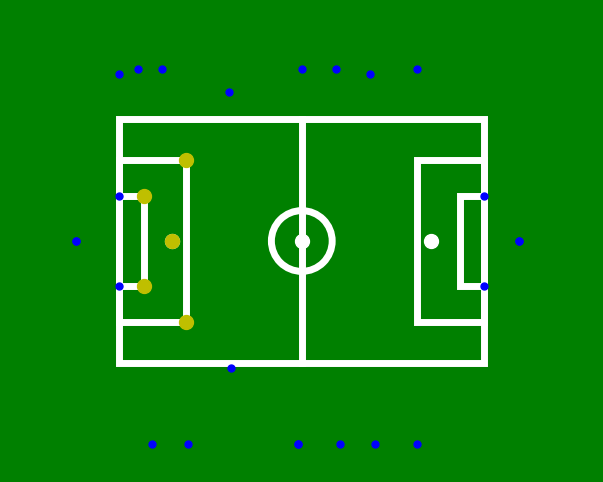

In [236]:
import matplotlib.pyplot as plt
from matplotlib import patches

# Unique marker keys with (x, x, z (in mm), length_of_square (in m))
markers = {
    # window
    # "36H11_
    "79": (-4500, 1060+3000+50, 510, 0.08),
    # "36H11_
    "26": (-4500+450, 130 + 1060 +3000+50, 1080, 0.235),
    # "36H12_
    "67": (-4500+450+530+80, 130 + 1060 +3000+50, 1000, 0.2),
    # "36H11_
    "69": (-1800, 620 + 3000+50, 500, 0.08),
    # "36H11_
    "18": (0, 130 + 1060 +3000+50, 1050, 0.28),
    # "36H12_
    "47": (840, 130 + 1060 +3000+50, 1050, 0.2),
    # "36H11_
    "9": (840+850, 1060 +3000+50, 500, 0.08),
    # "36H11_
    "66": (840+850+1150, 130 + 1060 +3000+50, 1100, 0.235),

    # tables
    # "36H11_
    "39": (4500, 1100, 500, 0.08),
    # "36H11_
    "46": (4550+820, 0, 1680, 0.235), #the one up
    # "36H12_
    "57": (4550+820, 0, 1000, 0.2), # the lower one
    # "36H11_
    "49": (4500, -1100, 500, 0.08),

    # wall
    # "36H11_
    "16": (2850, -2000-3005, 1070, 0.235),
    # "36H11_
    "19": (2850-1050, -2000-3005, 510, 0.08),
    # "7x7_
    "37": (2850-1050-850, -2000-3005, 1000, 0.2),
    # "36H11_
    "8": (2850-1050-850-1050, -2000-3005, 500, 0.08), #one on the bottom
    # "36H11_
    "29": (2850-1050-850-1050, -2000-3005, 1060, 0.275), #one on top
    # "36H11_
    "59": (-2800+1050, -120-3005, 510, 0.08), #column one
    # "7x7_
    "27": (-2800, -2000-3005, 1000, 0.2), #
    # "36H11_
    "36": (-2800-900, -2000-3005, 1080, 0.235),

    #ducks
    # "7x7_
    "7": (-4600-50-930, 0, 1680, 0.2), #lower one in column
    # "36H11_
    "56": (-4600-50-930, 0, 1000, 0.235), #top one in column
    # "36H11_
    "89": (-4500, -1100, 450, 0.08),
    # "36H11_
    "99": (-4500,1100, 500, 0.08), #window
}
# print(len(markers))
# Dimensions in mm
A = 9000  # Field length
B = 6000  # Field width
C = 50    # Line width
D = 100   # Penalty mark size
E = 600   # Goal area length
F = 2200  # Goal area width
G = 1650  # Penalty area length
H = 4000  # Penalty area width
I = 1300  # Penalty mark distance
J = 1500  # Center circle diameter
K = 2700   # Border strip width

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("green")  # Set the background color to green

# Draw the outer field
outer_field = patches.Rectangle((0, 0), A, B, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(outer_field)

# Goal areas
goal_area_left = patches.Rectangle((0, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
goal_area_right = patches.Rectangle((A - E, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(goal_area_left)
ax.add_patch(goal_area_right)

# Penalty areas
penalty_area_left = patches.Rectangle((0, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
penalty_area_right = patches.Rectangle((A - G, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(penalty_area_left)
ax.add_patch(penalty_area_right)

# Penalty marks
ax.plot(I, B / 2, 'wo', markersize=D/10)  # Left penalty mark
ax.plot(A - I, B / 2, 'wo', markersize=D/10)  # Right penalty mark

# Center circle
center_circle = patches.Circle((A / 2, B / 2), J / 2, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(center_circle)
ax.plot(A / 2, B / 2, 'wo', markersize=D/10)  # Center mark

# Halfway line
ax.plot([A / 2, A / 2], [0, B], 'white', linewidth=C/10)



#Plot the ducks
ax.plot(G, int((B+H)/2), 'yo', markersize=10)
ax.plot(G, int((B-H)/2), 'yo', markersize=10)
ax.plot(E, int((B+F)/2), 'yo', markersize=10)
ax.plot(E, int((B-F)/2), 'yo', markersize=10)
ax.plot(I, B / 2, 'yo', markersize=10)  

# Plot the markers on the field
for marker, (x, y, z, _) in markers.items():
    # Convert (x, y) to pixel coordinates
    x #*= 1000
    y #*=1000
    x_img = int((x + A/2) )
    y_img = int((y + B/2) )

    # Draw a blue circle for each marker
    ax.plot(x_img, y_img, 'bo', markersize=5)


# Show position
ax.plot(average_x, average_y, 'ro', markersize=10)


# Set the limits and aspecs
ax.set_xlim(-K, A + K)
ax.set_ylim(-K, B + K)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Turn off axe
plt.show()